In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

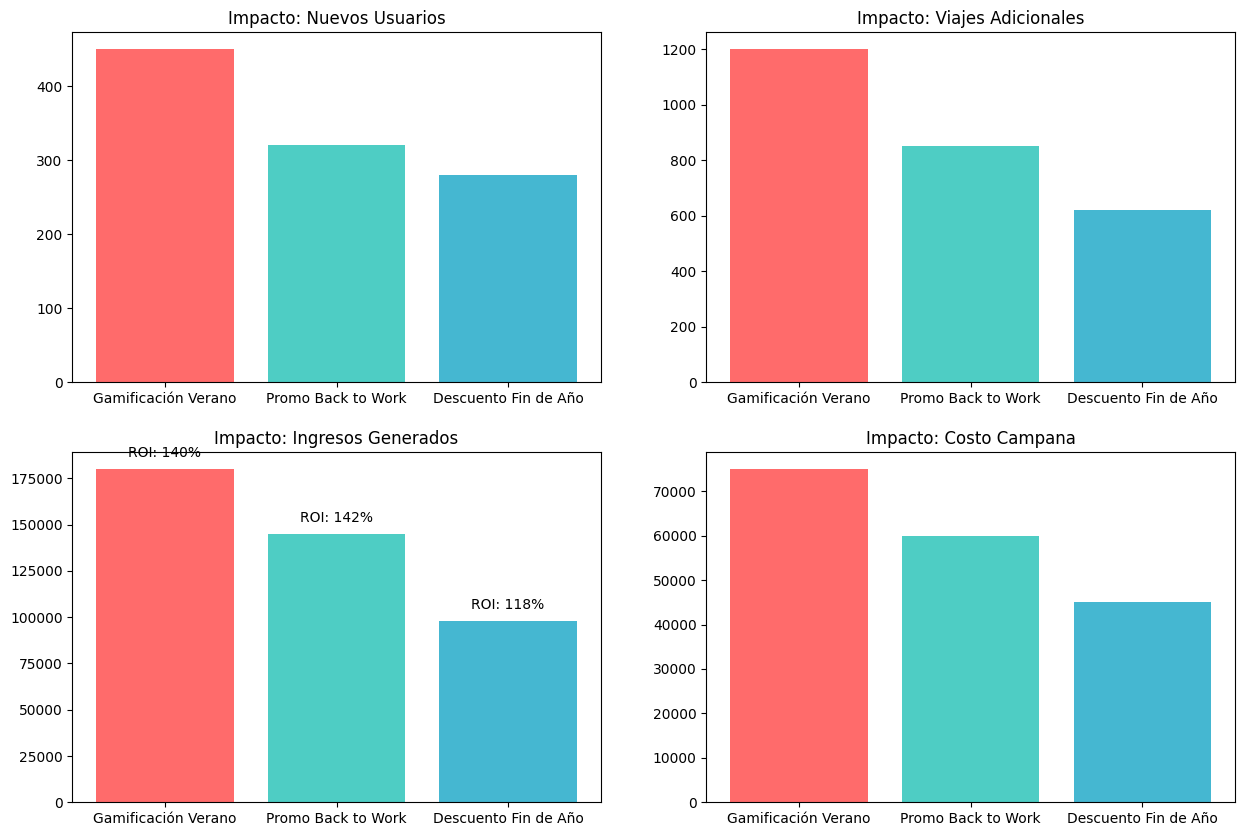

In [2]:
# Visualización del impacto de campañas
campañas = ['Gamificación Verano', 'Promo Back to Work', 'Descuento Fin de Año']
impacto_metricas = {
    'nuevos_usuarios': [450, 320, 280],
    'viajes_adicionales': [1200, 850, 620],
    'ingresos_generados': [180000, 145000, 98000],
    'costo_campana': [75000, 60000, 45000]
}

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, (metrica, valores) in enumerate(impacto_metricas.items()):
    ax = axes[i//2, i%2]
    bars = ax.bar(campañas, valores, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax.set_title(f'Impacto: {metrica.replace("_", " ").title()}')
    
    # Añadir ROI en gráfico de ingresos
    if metrica == 'ingresos_generados':
        for j, (bar, ingreso) in enumerate(zip(bars, valores)):
            costo = impacto_metricas['costo_campana'][j]
            roi = ((ingreso - costo) / costo) * 100
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000, 
                   f'ROI: {roi:.0f}%', ha='center', va='bottom')

In [5]:
matriz_elasticidad = {
    'Estudiantes': {
        'elasticidad': -1.8,
        'tipo': 'Elástica',
        'precio_actual': 149,
        'precio_optimo': 129,
        'demanda_esperada': '+15%',
        'ingreso_total': '+5%'
    },
    'Profesionales': {
        'elasticidad': -0.7,
        'tipo': 'Inelástica',
        'precio_actual': 399,
        'precio_optimo': 449,
        'demanda_esperada': '-8%',
        'ingreso_total': '+12%'
    },
    'Ejecutivos': {
        'elasticidad': -0.4,
        'tipo': 'Inelástica',
        'precio_actual': 799,
        'precio_optimo': 899,
        'demanda_esperada': '-5%',
        'ingreso_total': '+18%'
    },
    'Turistas': {
        'elasticidad': -1.2,
        'tipo': 'Elástica',
        'precio_actual': 99,
        'precio_optimo': 89,
        'demanda_esperada': '+20%',
        'ingreso_total': '+8%'
    }
}

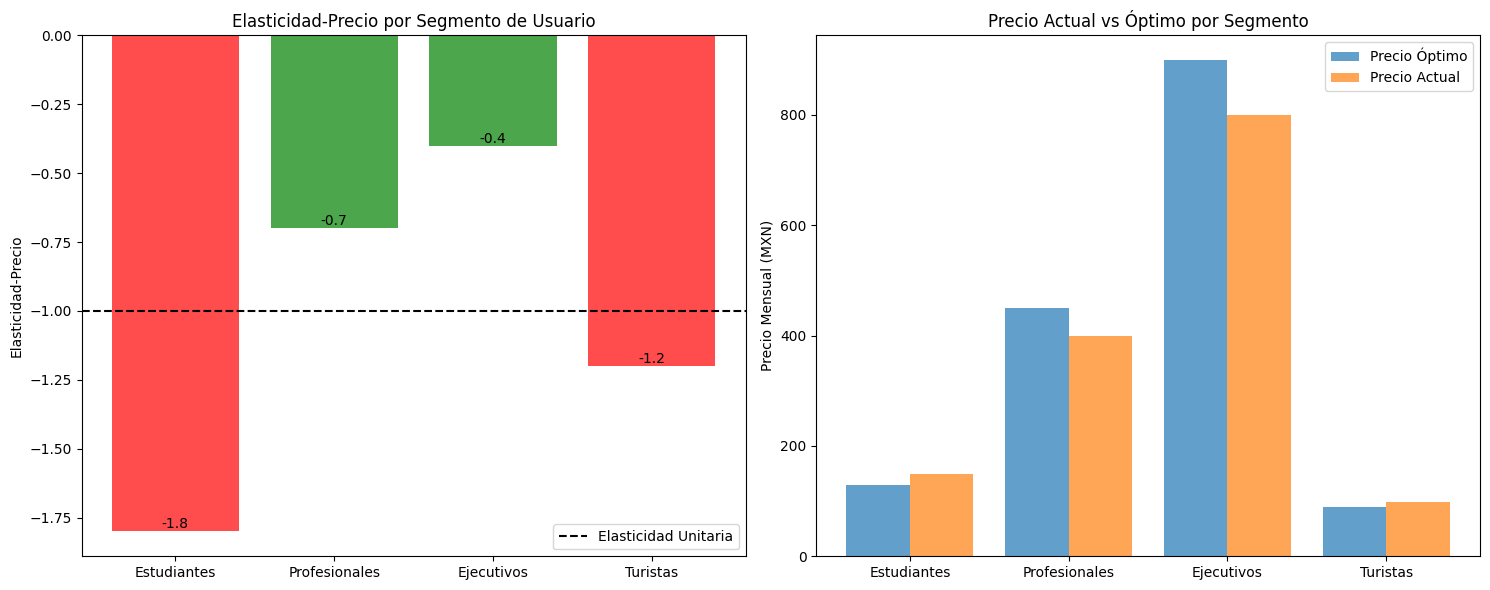

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear matriz de elasticidad
segmentos = list(matriz_elasticidad.keys())
elasticidades = [matriz_elasticidad[s]['elasticidad'] for s in segmentos]
precios_optimos = [matriz_elasticidad[s]['precio_optimo'] for s in segmentos]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Elasticidad por segmento
colors = ['red' if e < -1 else 'green' for e in elasticidades]
bars = ax1.bar(segmentos, elasticidades, color=colors, alpha=0.7)
ax1.axhline(y=-1, color='black', linestyle='--', label='Elasticidad Unitaria')
ax1.set_ylabel('Elasticidad-Precio')
ax1.set_title('Elasticidad-Precio por Segmento de Usuario')
ax1.legend()

# Añadir anotaciones
for bar, elasticidad in zip(bars, elasticidades):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{elasticidad:.1f}', ha='center', va='bottom')

# Gráfico 2: Precios óptimos vs actuales
x_pos = range(len(segmentos))
ax2.bar(x_pos, precios_optimos, width=0.4, label='Precio Óptimo', alpha=0.7)
precios_actuales = [matriz_elasticidad[s]['precio_actual'] for s in segmentos]
ax2.bar([x + 0.4 for x in x_pos], precios_actuales, width=0.4, label='Precio Actual', alpha=0.7)
ax2.set_xticks([x + 0.2 for x in x_pos])
ax2.set_xticklabels(segmentos)
ax2.set_ylabel('Precio Mensual (MXN)')
ax2.set_title('Precio Actual vs Óptimo por Segmento')
ax2.legend()

plt.tight_layout()
plt.show()